## TEAM 4 
- @mnestr 
- @Jurix1c 
- @Ivan S.
- @Vladimir Moroz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Посмотрим бенчмарк

In [2]:
samp_sub = pd.read_csv('sample_submission.csv')

In [3]:
samp_sub.head()

,_id,target
0,66810d8e6bf2b41c880a7bc6c8a1e295,0
1,ccac3879652b08cb8b44c1920fd93afa,0
2,fcccab4d7a76f70647f015f2c84c2af8,0
3,ed8399278c30678dab739045fa12b440,0
4,1d4d62ac5cabcb48bac7112813f290cb,0


In [4]:
#Количество строк в бенчмарке
samp_sub.shape[0]

16476

### Посмотрим Train - Test данные

### Описание данных
#### Метрика ROC-AUC

- **_id** - идентификатор человека
- **age** - возраст
- **job** - тип работы ("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
- **marital** - семейное положение ("divorced" (разведенный и овдовевший),"married","single","unknown")
- **education** - уровень образования ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
- **default** - есть ли дефолт по кредиту ("no","yes","unknown")
- **housing** - есть ли кредит на жилье ("no","yes","unknown")
- **loan** - есть ли персональный кредит ("no","yes","unknown")
- **contact** - контактный тип связи ("cellular","telephone")
- **month** - последний контактный месяц года ("jan", "feb", "mar", ..., "nov", "dec")
- **day_of_week**- последний контактный день недели ("mon","tue","wed","thu","fri")
- **duration** - длительность последнего контакта в секундах. (Важное замечание: этот атрибут сильно влияет на таргет (например, если длительность - 0 сек., то таргет - 0). Тем не менее, продолжительность не известна до выполнения вызова.
- **campaign** - количество контактов, выполненных для этого клиента в рамках текущей маркетинговой кампании (включая последний контакт)
- **pdays** - количество дней прошедших последнего контакта с клиентом с предыдущей маркетинговой кампании (999 означает, что ранее с клиентом не контактировали)
- **previous** - количество контактов, выполненных до текущей маркетинговой кампании для этого клиента
- **poutcome** - результат предыдущей маркетинговой кампании ("failure","nonexistent","success")

#### Ниже приведены показатели окружающей среды и банка

- **emp.var.rate** - изменение уровня занятости (квартальный показатель)
- **cons.price.idx** - индекс потребительских цен (ежемесячный показатель)
- **cons.conf.idx** - индекс доверия потребителя (ежемесячный показатель)
- **euribor3m** - курс Euribor (ежедневный показатель)
- **nr.employed** - количество сотрудников (квартальный показатель)
- **target** - целевая переменная (таргет) - согласился ли клиент на вклад (депозит)

In [5]:
train =  pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.shape

(24712, 22)

In [7]:
test.shape

(16476, 21)

In [8]:
print(train.columns)

Index(['_id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype='object')


In [9]:
test.columns

Index(['_id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

In [11]:
train.duration.describe()

count    24712.000000
mean       258.345298
std        261.573344
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

работаем только с train данными, тк test не размечен.

### Начнём исследование данных

In [12]:
#campaign #pdays #nunique #poutcome можно преобразовать и получить доп признаки

1) для начала объеденим train и test
2) преобразуем obj в признаки и попробуем прогнать модель на: 
- кнн
- дерева принятия решения
- логистической регрессии 

In [13]:
#ответы для трейн данных переместим в переменную
y_train = train.iloc[:,-1]

In [14]:
#для простого разделения воспользуемся метками ( на примере прошлого занятия)
train.loc[:, 'sample'] = 'train'
test.loc[:, 'sample'] = 'test'

In [15]:
train.shape

(24712, 23)

In [16]:
test.columns

Index(['_id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'sample'],
      dtype='object')

In [17]:
#для корректного слияния данных  нужно убрать колонку таргет
data = train.drop('target',axis = 1).append(test).reset_index(drop=True)

In [18]:
#проверка суммы строк в ячейке объеденённых данных и в исходной таблице
data[data['sample'] == 'train'].shape[0] == train.shape[0]

True

In [19]:
#проверим сумму строк в лбъединённой таблице и с исходными
print(data.shape[0] == (train.shape[0] + test.shape[0]))
print(data.shape)

True
(41188, 22)


In [20]:
#выполним трансформацию признаков из obj в числовые
#создадим список признаков
obj_lst = []
for i in data.columns: # перебираем все столбцы
    if str(data[i].dtype) == 'object':
        obj_lst.append(i)

In [21]:
obj_lst

['_id',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'sample']

In [22]:
#преобразуем категориальные признаки в числовые исключив _id и sample данные
df = pd.get_dummies(data, columns = obj_lst[1:-1])

In [23]:
#получилось 65 признаков
df.shape

(41188, 65)

In [24]:
#разделим данные
df_train_preproc = df[df['sample'] == 'train'].drop(['_id', 'sample'],axis = 1)
df_test_preproc = df[df['sample'] == 'test'].drop(['_id', 'sample'],axis = 1)

In [25]:
#Исследуем данные и убедимся что все данные числовые
df_train_preproc.shape

(24712, 63)

### Начнём тренировать модели

In [26]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(df_train_preproc, y_train, test_size = 0.3, random_state = 42)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [28]:
tree = DecisionTreeClassifier(random_state=42)
reg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()

In [29]:
knn.fit(X,y)
knn_predict = knn.predict(X_test)

In [30]:
tree.fit(X,y)
tr_predict = tree.predict(X_test)

In [31]:
reg.fit(X,y)
reg_predict = reg.predict(X_test)

In [32]:
def metrics_scores(act_val, pred_val):
    return accuracy_score(act_val, pred_val),precision_score(act_val, pred_val),recall_score(act_val, pred_val)

In [33]:
# Посмотрим стандартные метрики ошибок
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print("Desc Tree")
print("Predict      :(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, tr_predict), precision_score(y_test, tr_predict),recall_score(y_test, tr_predict)))
print("")
print("Logistics regression")
print("Predict      :(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, reg_predict), precision_score(y_test, reg_predict),recall_score(y_test, reg_predict)))
print("")
print("KNN")
print("Predict      :(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, knn_predict), precision_score(y_test, knn_predict),recall_score(y_test, knn_predict)))


Desc Tree
Predict      :(Acc: 0.8876449959536012 , Pres: 0.5057339449541285 , Rec: 0.5231316725978647) :

Logistics regression
Predict      :(Acc: 0.9107094685729701 , Pres: 0.6730401529636711 , Rec: 0.41755634638196915) :

KNN
Predict      :(Acc: 0.900593471810089 , Pres: 0.5765895953757225 , Rec: 0.47330960854092524) :


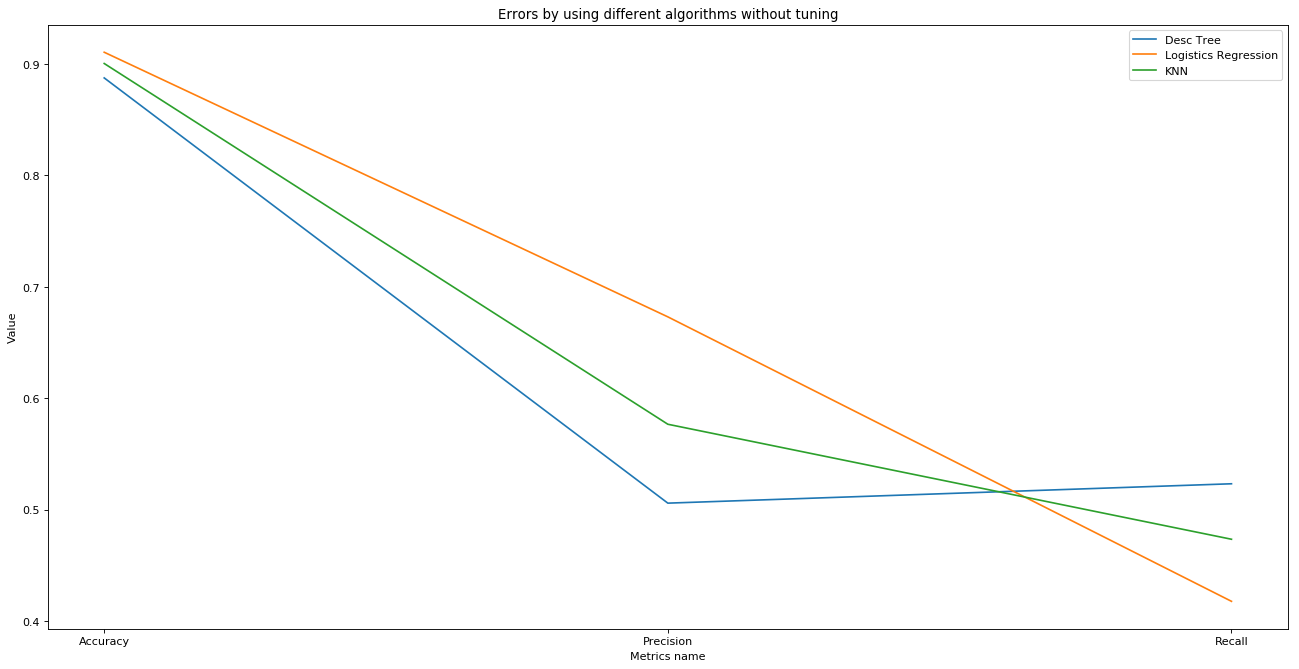

In [34]:
# Визуализируем эти метрики для всех моделей на одном графике (чтоб визуально оценить)

plt.figure(figsize=(20,10), dpi=80)
plt.xlabel('Metrics name')
plt.ylabel('Value')
plt.title('Errors by using different algorithms without tuning')
plot1 = plt.plot(['Accuracy', 'Precision', 'Recall'],metrics_scores(y_test,tr_predict), label = 'Desc Tree')
plot3 = plt.plot(['Accuracy', 'Precision', 'Recall'],metrics_scores(y_test,reg_predict), label = 'Logistics Regression')
plot4 = plt.plot(['Accuracy', 'Precision', 'Recall'],metrics_scores(y_test,knn_predict), label = 'KNN')
plt.legend(loc = 'upper right')


(-0.01, 1.01)

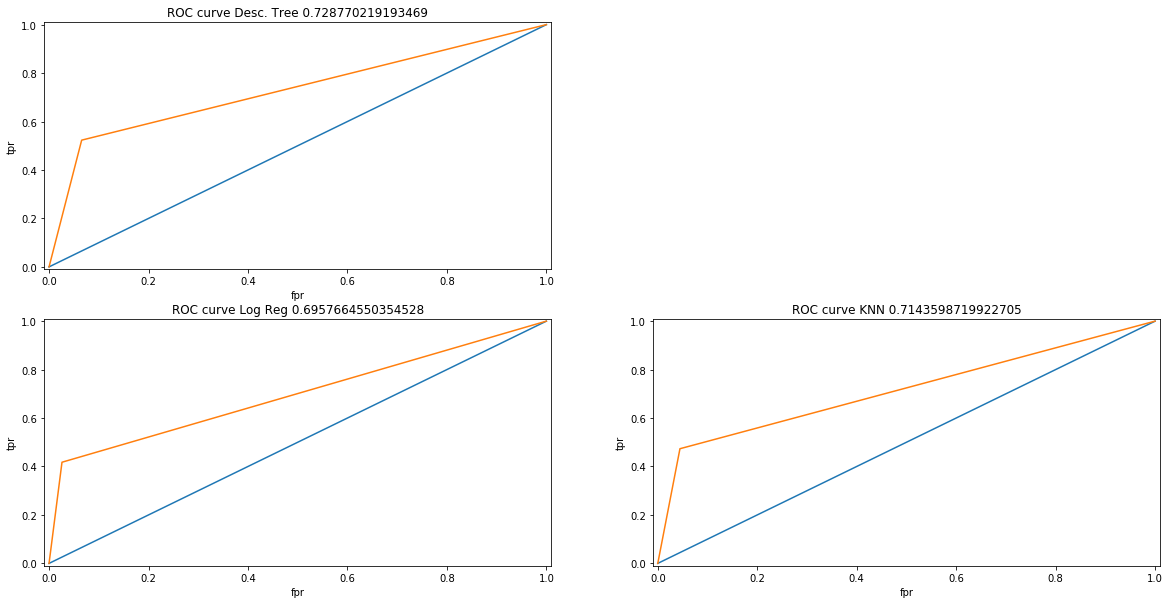

In [35]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, tr_predict)
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve Desc. Tree ' + str(roc_auc_score(y_test, tr_predict)))
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

#второй график
fpr, tpr, thresholds = roc_curve(y_test, reg_predict)
plt.subplot(223)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve Log Reg ' + str(roc_auc_score(y_test, reg_predict)))
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

#третий график
fpr, tpr, thresholds = roc_curve(y_test, knn_predict)
plt.subplot(224)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve KNN ' + str(roc_auc_score(y_test, knn_predict)))
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [36]:
# Cохраним предсказания по решающему дереву и засабмитим на Kaggle
tr_predict_test_data = tree.predict(df_test_preproc)
#создали колонку Target c предсказанными значениями
my_sub = pd.DataFrame(test['_id'])
my_sub['target'] = pd.DataFrame(tr_predict_test_data, columns = ['target'])
my_sub.to_csv('my_sub_tree.csv',index = False)

#### Лучший резальтат даёт алгорим решающих деревьев. Попробуем настроить модель методом решающих деревьев применяя кросс-валидацию, построим кривые ROC-AUC

### Попробуем настроить модели для DT т.к.  они показали себя лучше всего на AUC-ROC

#### Начнём с деревьев решений

In [57]:
from sklearn.model_selection import GridSearchCV

In [68]:
#создадим словарь с параметрами для решающщего дерева
tree_params = {'max_depth': range(10,15),'max_features': range(25,35)}

In [69]:
tree_grid = GridSearchCV(tree, tree_params,cv=5, n_jobs=-1,verbose=True)

In [70]:
tree_grid.fit(X, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   13.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(10, 15), 'max_features': range(25, 35)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [71]:
tree_grid.best_params_

{'max_depth': 10, 'max_features': 30}

In [72]:
tree_grid.best_score_

0.9061741241762054

In [73]:
tree_grid_pred = tree_grid.predict(X_test)

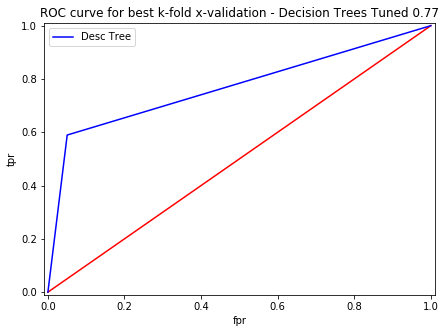

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, tree_grid_pred)
plt.figure(figsize=(7, 5))
plt.plot([0, 1], [0, 1], color = 'red')
plt.plot(fpr, tpr, label = 'Desc Tree', color = 'blue')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve for best k-fold x-validation - Decision Trees Tuned ' + str(round(roc_auc_score(y_test, tree_grid_pred),3)))
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

In [75]:
# Выполним предсказание по модели
dt_grid = tree_grid.predict(df_test_preproc)

In [76]:
# Cохраним предсказание

tr_predict_test_data = tree.predict(df_test_preproc)
#создали колонку Target c предсказанными значениями
my_sub = pd.DataFrame(test['_id'])
my_sub['target'] = pd.DataFrame(tr_predict_test_data, columns = ['target'])
my_sub.to_csv('my_sub_tree_grid_search_tuned_AUC_ROC_0.77.csv',index = False)

#### Займёмся немного Feature engeneering и попробуем улучшить модель (knn показала себя по качеству близкой к деревьям, возможно после регуляризации первый алгоритм сработает лучше, тк он чувствителен к значениям шкалы)

In [78]:
"""data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()"""

'data_numerical = data[numerical_columns]\ndata_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()\ndata_numerical.describe()'